# Regression
(by Tevfik Aytekin)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import math
import time
from tqdm import tqdm
import copy
from IPython import display
import pylab as pl



# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../../datasets/house/train.csv")
#train = pd.read_csv("train.csv")

In [5]:
train.shape

(1460, 81)

In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


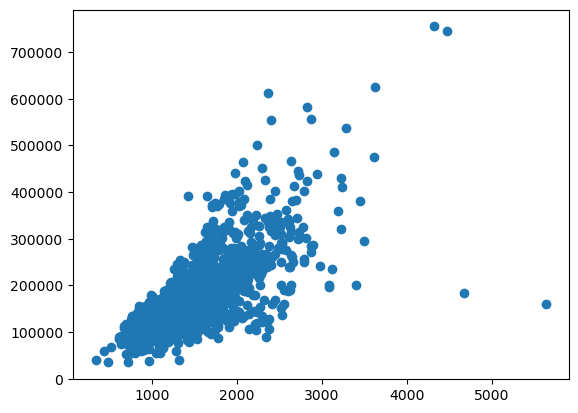

In [7]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

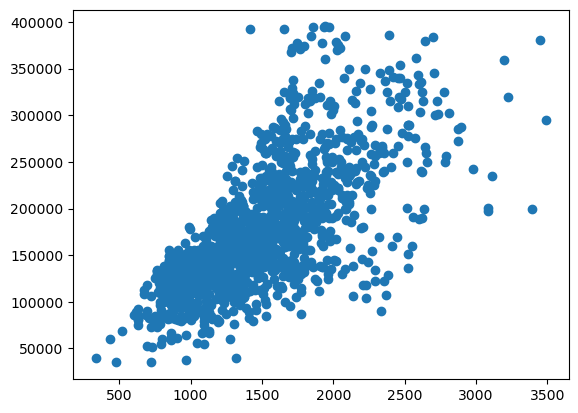

In [8]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


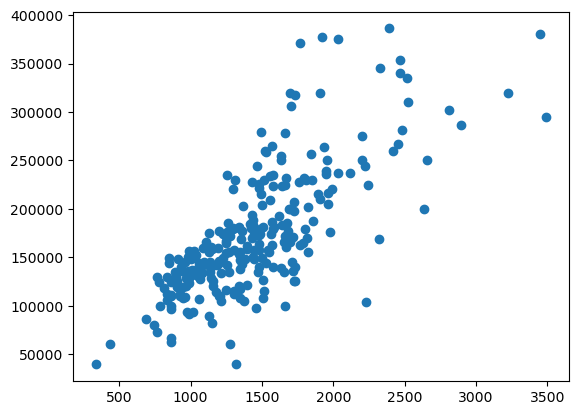

In [9]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [10]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

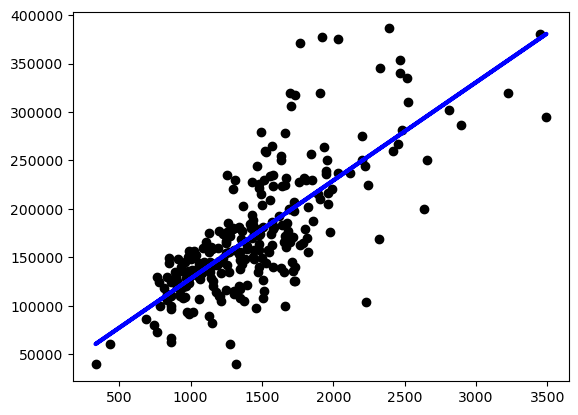

In [11]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)


In [12]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

26531.98172774189
[101.38696544]


In [13]:
def predict(GrLivArea):
    return model.intercept_ + model.coef_*GrLivArea

In [14]:
predict(1000)

array([127918.94716853])

#### Can we interpret the above coefficient as increase in price per square feet?

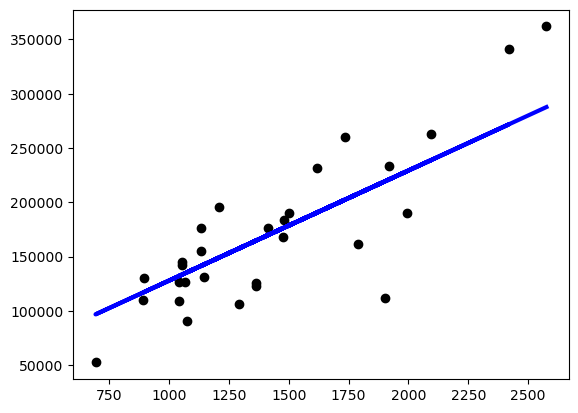

In [15]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [16]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 30592.67435025015
30592.67435025015
Test MAE: 31282.48646754419


In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 21.64238530090579


In [18]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.6699803854730887


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = 1 - \frac{RSSE}{MSSE} = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [19]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 53628.13873607943
Baseline (mean) MAPE: 37.82923065432909


In [20]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score2(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.25128104933425705
Baseline (mean) Kaggle-score: 0.4117907042598928


In [21]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [22]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    #kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
#print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 36797.59240247897
Test MAPE: 23.315539303841017
Intercept: 64324.7978805991
[['GrLivArea' '127.55783701786092']
 ['Bedroom' '-26857.103454096323']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

Interpretation of linear models are relatively easy (of course one should be careful about the assumptions of the model). For numerical features, changing the numerical feature by one unit changes the prediction by an amount of the size of its coefficient **when all other feature values are fixed**. So, it makes sense for the increase in the number of bedrooms to have a negative effect on sales price when the area is fixed. 

If you only use the BedroomAbvGr feature for prediction things will change.

In [23]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 57165.108428847176
Test Kaggle-Score: 0.40233176188360203
Test MAPE: 35.81821195831648
Intercept: 133797.5516736872
[['Bedroom' '16291.620132480162']]


### Prediction with two uncorrelated features

In [24]:
np.corrcoef(train.GrLivArea, train.YearBuilt)

array([[1.        , 0.19900971],
       [0.19900971, 1.        ]])

In [25]:
X = train.loc[:,['GrLivArea','YearBuilt']]
y = train.loc[:,'SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
test_predictions = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)


Test MAE: 29232.035744967136
Test Kaggle-score: 0.20434846803146933
Test MAPE: 16.245220731432703
Intercept: -2025501.7146499208
[['GrLivArea' 93.99644786516285]
 ['YearBuilt' 1047.0495817098629]]


In [26]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


ValueError: could not convert string to float: 'RL'

## Solution with normal equations

In [27]:
X = X_train
y = y_train

# add intercept
ones = np.ones(len(X)).reshape(len(X),1)
X = np.hstack((ones,X))

XTX = np.dot(X.T,X)
INV_XTX = np.linalg.inv(XTX)
INV_XTXXT = np.dot(INV_XTX, X.T)
result = np.dot(INV_XTXXT,y)

In [28]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
result

array([-2025501.71, 94.00, 1047.05])

As you can see we got the same coeffcients and intercept

In [29]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X);
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 18916.57126270989
Test Kaggle-Score: 0.1943367211367647
Test MAPE: 11.664100782834245
Intercept: -384429.20693139394
[['MSSubClass' -78.90969456802446]
 ['LotFrontage' 52.95990283764541]
 ['LotArea' 0.6918283409944688]
 ['OverallQual' 7257.858345123492]
 ['OverallCond' 6041.431381331471]
 ['YearBuilt' 390.5188225980033]
 ['YearRemodAdd' 84.60259608664438]
 ['MasVnrArea' 21.16300684867332]
 ['BsmtFinSF1' 14.205709572104574]
 ['BsmtFinSF2' 11.830692325438122]
 ['BsmtUnfSF' -4.87180419156482]
 ['TotalBsmtSF' 21.16465616621099]
 ['1stFlrSF' 17.515531236727384]
 ['2ndFlrSF' 37.11812327617099]
 ['LowQualFinSF' -26.573507535533555]
 ['GrLivArea' 28.060187826677975]
 ['BsmtFullBath' 1302.2703036424678]
 ['BsmtHalfBath' 53.03266945287042]
 ['FullBath' 2338.035848946975]
 ['HalfBath' 598.1080417470203]
 ['BedroomAbvGr' -4034.7016804766436]
 ['KitchenAbvGr' -7155.552870524731]
 ['TotRmsAbvGrd' 2420.452837710342]
 ['Fireplaces' 6777.989997968153]
 ['GarageYrBlt' -46.33730172648865]
 ['Ga

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [30]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


[-19066.38 -18857.80 -19927.87 -15994.64 -20173.37]


### Scaling and centering
In regression scaling is important for interpreting the resulting coefficients. And centering is important in order not to create correlated variables in creating polynomial terms. 

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [31]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[120.00 2012.00 150000.00]
[90.00 1990.00 100000.00]


In [33]:
print(scaler.transform(df))

[[0.33 0.00 0.00]
 [1.00 0.55 1.00]
 [0.00 1.00 0.40]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.27 -1.26 -1.14]
 [1.34 0.07 1.30]
 [-1.07 1.19 -0.16]]


### Example

In [35]:
X = train.loc[:,['GrLivArea','YearBuilt']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)
print(X_train_scaled)

Test MAE: 34253.262357850836
Test Kaggle-score: 0.26981538590835064
Test MAPE: 19.988357917094376
Intercept: -38063.824959013466
[['GrLivArea' 521453.88775617816]
 ['YearBuilt' 144504.88968173906]]
[[0.25 0.75]
 [0.24 0.66]
 [0.14 0.75]
 ...
 [0.12 0.60]
 [0.21 0.96]
 [0.17 0.78]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


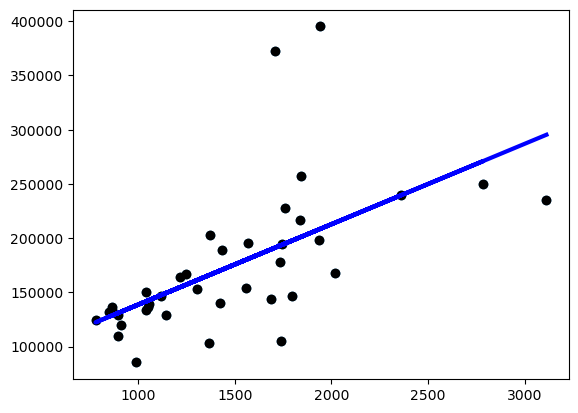

In [36]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

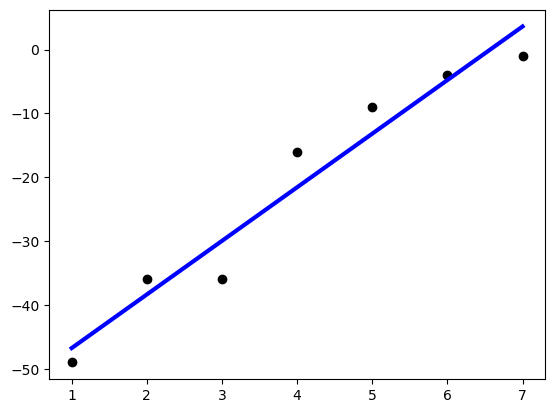

In [37]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25 -0.61]
-62.4285714285714


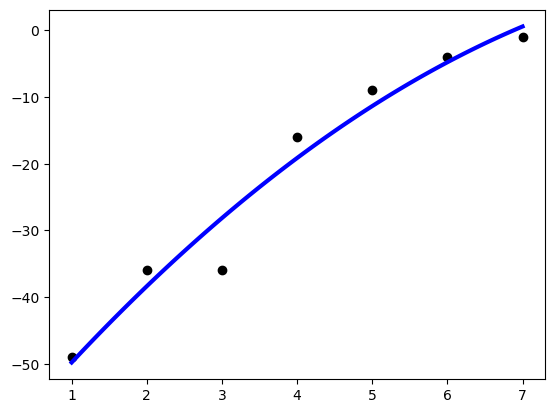

In [38]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[3.93 7.14 6.47 -0.50 -6.86 4.27 -1.06 0.12 -0.01]
-62.50258416955434


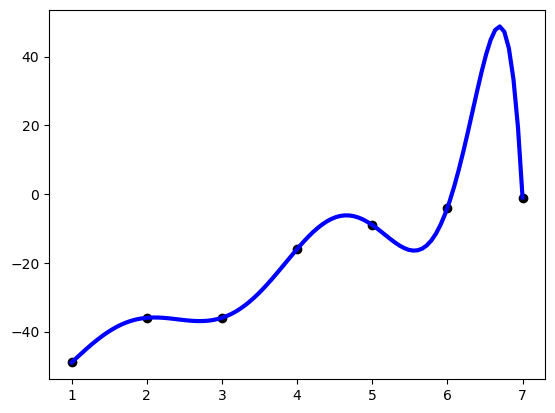

In [39]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[0.17 0.32 0.34 0.12 -0.16 0.11 -0.03 0.00 -0.00]
-46.628314514269405


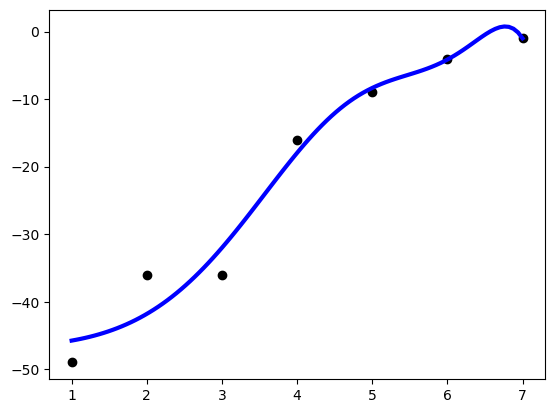

In [40]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=10)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [41]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.Ridge(alpha=10)
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

Test MAE: 36815.660598196526
Test Kaggle-Score: 0.2771685373239143
Test MAPE: 23.2228182139292
Intercept: -17138.245252619206
[[1710.00 3.00 2924100.00 5130.00 9.00]
 [1262.00 3.00 1592644.00 3786.00 9.00]
 [1786.00 3.00 3189796.00 5358.00 9.00]
 ...
 [2340.00 4.00 5475600.00 9360.00 16.00]
 [1078.00 2.00 1162084.00 2156.00 4.00]
 [1256.00 3.00 1577536.00 3768.00 9.00]]


### Batch Gradient Descent Implementation

In [85]:
class MyLinearRegression:
    
    def cost(self, X, y, w, b):
        return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

    def __init__(self, n_iter = 100, learning_rate = 0.1, anim = False):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.cost_array = []
        self.anim = anim
    def predict(self, X):
        
        preds = np.dot(X, self.w) + self.b
        return preds.reshape(-1)

    # Define the update function for the animation
    def update(self, i):
        y = np.dot(self.X,self.dw_array[i,:]) + self.b
        self.line.set_data(self.X, y)
        self.ax.set_title(f'Epoch {i}, Loss: {self.cost_array[i]:.4f}')
        return self.line,
   
    def fit(self, X, y):
        self.X = X
        self.y = y
        n_features = X.shape[1]
        self.dw_array = np.zeros([self.n_iter, n_features])
        self.b_array = np.zeros(self.n_iter)

        self.w = np.random.rand(n_features,1)
        self.b = np.random.rand()
        m = X.shape[0]
        y = y.reshape(y.size, 1)

        
        for iters in range(self.n_iter):
            c = self.cost(X,y,self.w,self.b)
            self.cost_array.append(c) 
            w_back = copy.deepcopy(self.w)
            for j in range(n_features): 
                dw = 0
                for i in range(m):
                    dw = dw + (y[i] - (np.dot(X[i].reshape([1,n_features]), w_back) + self.b)) * X[i,j]
                self.w[j] = w_back[j] + self.learning_rate * dw/m
                self.dw_array[iters, j] = self.w[j][0]
            db = 0
            for i in range(m):
                db = db + (y[i] - (np.dot(X[i].reshape([1,n_features]), w_back) + self.b))
            self.b = self.b + self.learning_rate * db/m;
            self.b_array[iters] = self.b[0][0]

            
        if self.anim == True:
            self.fig, self.ax = plt.subplots()
            self.ax.scatter(X, y,  color='black')
            self.line, = self.ax.plot([], [], lw=2)
                
            # Create the animation object and display it in the notebook
            self.anim = FuncAnimation(self.fig, self.update, frames=self.n_iter, interval=200)
            plt.show()


In [86]:
X = train.loc[:,['GrLivArea']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
#scaler = MinMaxScaler()
#scaler = scaler.fit(X)
#X = scaler.transform(X)

In [87]:
%matplotlib notebook
model = MyLinearRegression(n_iter = 100, learning_rate=0.00000001, anim=True)
model.fit(X,y)

<IPython.core.display.Javascript object>

In [81]:
a = [[0.86]]
a[0][0]

0.86

In [46]:
from sklearn.metrics import mean_absolute_error
X = train.loc[:,['GrLivArea']]
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

reg1 = linear_model.LinearRegression()
reg2 = MyLinearRegression(n_iter=1000, learning_rate=0.0000001)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

print(mean_absolute_error(y_test, reg1.predict(X_test)))
print(mean_absolute_error(y_test, reg2.predict(X_test)))
print(mean_absolute_error(y_train, reg2.predict(X_train)))


/var/folders/8v/tw2k9h3n5k5d1stxdsh3q6d00000gn/T/ipykernel_23102/879848760.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.dw_array[iters, j] = self.w[j]
/var/folders/8v/tw2k9h3n5k5d1stxdsh3q6d00000gn/T/ipykernel_23102/879848760.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.b_array[iters] = self.b


36302.682466140584
36791.94285379058
38557.613796698075


In [47]:
print(reg1.coef_)
print(reg1.intercept_)

[104.91]
21985.560504846508


In [48]:
print(reg2.w)
print(reg2.b)

[[117.89]]
[[0.83]]


In [49]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, reg1.predict(X_test), color='blue', linewidth=3)
plt.plot(X_test, reg2.predict(X_test), color='red', linewidth=3)

<IPython.core.display.Javascript object>